In [1]:
from note03 import sim_bw, vis_bw
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In R library `lmer`, the expression
```R
Body weight ~ Month + X1 + X2 + X3 + (1 + Month | Sire)
```


In linear algebra, we can write the same expression as

$$

\mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \mathbf{Z}\mathbf{u} + \boldsymbol{\epsilon} 

$$

$$
\mathbf{X}=\left[\begin{array}{c}
1 \\
x_{m} \\
x_{1} \\
x_{2} \\
x_{3}
\end{array}\right]^T,
\mathbf{\beta}=\left[\begin{array}{c}
\beta_0 \\
\beta_m \\
\beta_{x1} \\
\beta_{x2} \\
\beta_{x3}
\end{array}\right],
\mathbf{Z}=\left[\begin{array}{c}
s_1m_0\\
s_1m_1 \\
s_1m_2 \\
\vdots \\
s_3m_{23}\\
s_3m_{24}\\
\end{array}\right]^T
$$

$$

\mathbf{u} \sim \mathcal{N}(\mathbf{0}, \sigma^{2}_{u}(A_{3\times 3}
 \otimes I_{25}))
$$
$$
\boldsymbol{\epsilon} \sim \mathcal{N}(\mathbf{0}, \sigma^{2}_{e} I_{n})
$$

--- Simulated Pedigree ---
   id  sire  dam
0   1     0    0
1   2     0    0
2   3     1    2
3   4     1    2
4   5     0    0
--------------------------


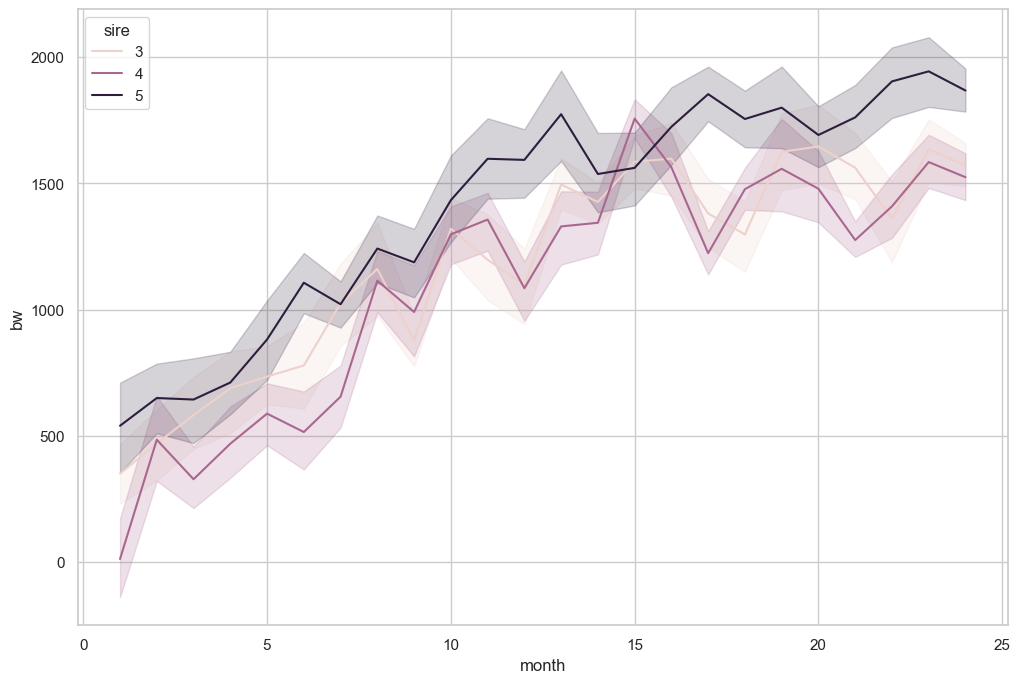

In [7]:
# np.random.seed(0)
data = sim_bw()
vis_bw(data)

In [4]:
data

,sire,cow,month,x1,x2,x3,bw
0,4,1,1,0.273729,0.668339,-0.184951,397.196371
1,4,1,2,-1.394840,-0.953179,-0.176783,261.789918
2,4,1,3,0.795550,-0.479297,-2.199254,156.455479
3,4,1,4,-0.114962,-1.345508,0.729289,807.458227
4,4,1,5,0.495851,-3.392300,1.100558,775.164782
...,...,...,...,...,...,...,...
715,6,10,20,-0.583841,-1.207666,-0.316912,1260.922866
716,6,10,21,-1.023701,-0.545444,-1.586865,1078.811471
717,6,10,22,-0.759934,1.553283,0.788687,1813.332606
718,6,10,23,-0.472323,0.107291,0.137225,1586.179686


In [5]:
data_train_A = data.query("month <= 16")
data_test_A = data.query("month > 16")

data_train_B = data.query("sire != 6")
data_test_B = data.query("sire == 6")

data_shuffled = data.sample(frac=1)
data_train_C = data_shuffled.iloc[:480]
data_test_C = data_shuffled.iloc[480:]

Intercept    499.265571
month         60.622988
x1            46.034955
x2            97.522487
x3           194.744199
dtype: float64
correlation:  0.9161265168743161
mse:  43586.11257851835


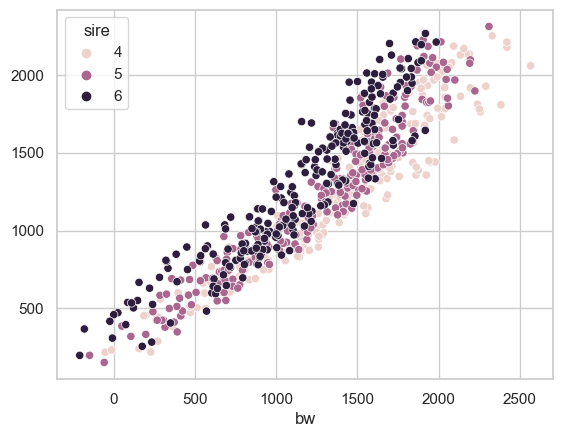

In [10]:
model_ols = smf.ols("bw ~ month + x1 + x2 + x3", data).fit()
print(model_ols.params)
pre = model_ols.predict()
obs = data["bw"]
sns.scatterplot(y=pre, x=obs, hue=data["sire"])
print("correlation: ", np.corrcoef(pre, obs)[0, 1])
mse = np.mean((pre - obs) ** 2)
print("mse: ", mse)

Intercept    287.593089
month         90.682147
x1            34.634772
x2           102.406743
x3           192.869216
dtype: float64
correlation:  0.6892841098297812
mse:  293748.0864292434


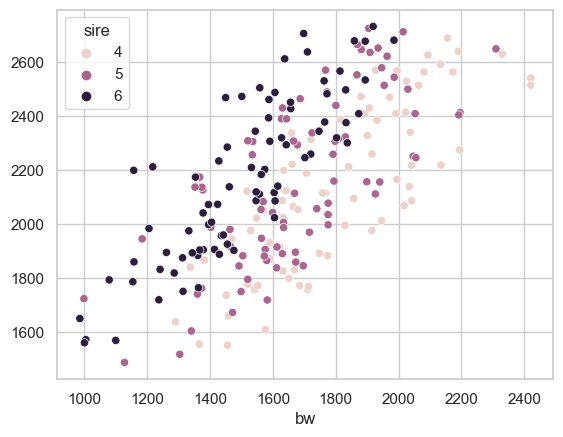

In [11]:
model_ols = smf.ols("bw ~ month + x1 + x2 + x3", data_train_A).fit()
print(model_ols.params)
pre = model_ols.predict(data_test_A)
obs = data_test_A["bw"]
sns.scatterplot(y=pre, x=obs, hue=data["sire"])
print("correlation: ", np.corrcoef(pre, obs)[0, 1])
mse = np.mean((pre - obs) ** 2)
print("mse: ", mse)

Intercept    553.073006
month         61.934788
x1            59.684312
x2           113.469476
x3           202.607607
dtype: float64
correlation:  0.9217769772092866
mse:  80472.32527450655


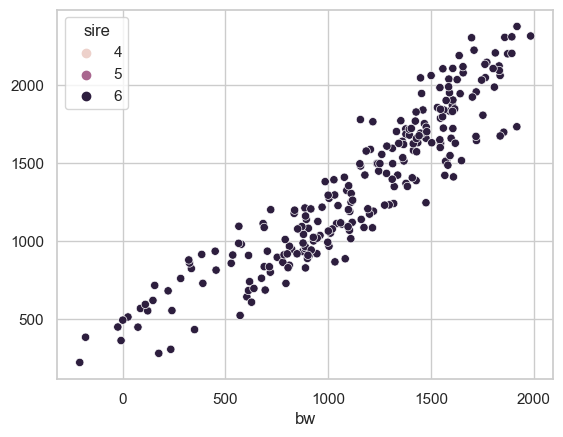

In [15]:
model_ols = smf.ols("bw ~ month + x1 + x2 + x3", data_train_B).fit()
print(model_ols.params)
pre = model_ols.predict(data_test_B)
obs = data_test_B["bw"]
sns.scatterplot(y=pre, x=obs, hue=data["sire"])
print("correlation: ", np.corrcoef(pre, obs)[0, 1])
mse = np.mean((pre - obs) ** 2)
print("mse: ", mse)

Intercept    494.295247
month         60.894090
x1            49.657642
x2           110.949387
x3           197.700067
dtype: float64
correlation:  0.8993326155572988
mse:  42798.942361486144


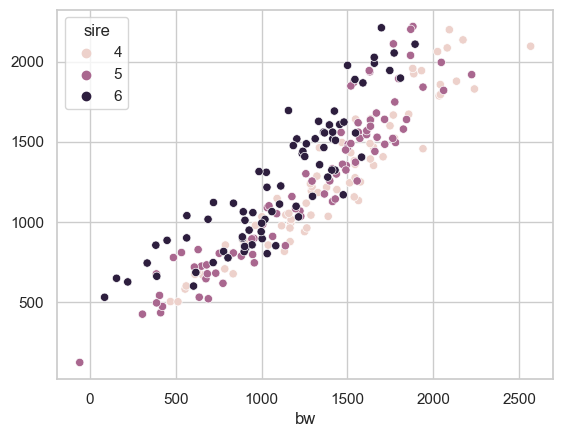

In [13]:
model_ols = smf.ols("bw ~ month + x1 + x2 + x3", data_train_C).fit()
print(model_ols.params)
pre = model_ols.predict(data_test_C)
obs = data_test_C["bw"]
sns.scatterplot(y=pre, x=obs, hue=data["sire"])
print("correlation: ", np.corrcoef(pre, obs)[0, 1])
mse = np.mean((pre - obs) ** 2)
print("mse: ", mse)